In [3]:
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import os
import os.path
from pathlib import Path
import cv2
import numpy as np
import random
import math
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# import shutil 

import torch.nn as nn
import numpy as np
import torch.nn.functional as F

import plotly.graph_objects as go
import plotly.express as px


In [4]:
random.seed = 42

In [5]:
train_data = datasets.MNIST(root = './data', train = True, download = True)
test_data = datasets.MNIST(root = './data', train = False, download = True)

## -----------------------Data Preprocessing --------------------------

##Image Data conversion to point cloud  

In [6]:
# # make data directories
# directory = "classes"
# parent_dir = "C:/Users/asvp0/Desktop/Happiness/data"
# path = os.path.join(parent_dir, directory)
# os.mkdir(path)

In [7]:
# for i in target_classes:
#     i = i
#     directory = i    
#     parent_dir = "C:/Users/asvp0/Desktop/Happiness/data/classes"
#     path = os.path.join(parent_dir, directory)
#     os.mkdir(path)

In [8]:
target_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
# for i in target_classes:
#     i = i
#     directory = str(i)
#     directory1 = "train"
#     parent_dir = "C:/Users/asvp0/Desktop/Happiness/data/classes"
#     path = os.path.join(parent_dir, directory)
#     path1 = os.path.join(path, directory1)
#     os.mkdir(path1)

In [10]:
# for i in target_classes:
#     i = i
#     directory = i
#     directory1 = "train"
#     directory2 = "test"
#     parent_dir = "C:/Users/asvp0/Desktop/Happiness/data/classes"
#     path = os.path.join(parent_dir, directory)
#     path1 = os.path.join(path, directory1)
#     path2 = os.path.join(path, directory2)
#     os.mkdir(path1)
#     os.mkdir(path2)

## Image data conversion to point cloud 3 coordinates

In [11]:
int(train_data.data.shape[0])

60000

In [12]:
count = 0
for i in range(int(train_data.data.shape[0] / 60000)):
    arr = np.asarray(np.where(train_data.data.numpy()[i] > 1)).T.astype(np.int32)
    z = np.zeros((arr.shape[0],1), dtype = int)
    arr = np.append(arr, z, axis=1).T
#     #print(arr)
#     arr = arr.tolist()
#     #print(arr)
    x, y, z = arr
    print(arr.shape)

(3, 164)


In [13]:

# count = 0
# for i in range(train_data.data.shape[0]):
#     arr = np.asarray(np.where(train_data.data.numpy()[i] > 1)).T.astype(np.int32)
#     z = np.zeros((arr.shape[0],1), dtype = int)
#     arr = np.append(arr, z, axis=1)
#     list = arr.tolist()
#     directory = os.path.abspath(os.path.join("C:/Users/asvp0/Desktop/Happiness/data/classes", str(train_data.targets[i].numpy()), "train")).replace("\\","/")
#     count += 1
#     file_name = "image" + "_" + str(count)
#     path = os.path.join(directory, file_name)
#     os.remove(path.replace("\\","/"))    

In [14]:
print(test_data.data.shape[0])

10000


In [15]:
# count = 0
# for i in range(train_data.data.shape[0]):
#     arr = np.asarray(np.where(train_data.data.numpy()[i] > 1)).T.astype(np.int32)
#     z = np.zeros((arr.shape[0],1), dtype = int)
#     arr = np.append(arr, z, axis=1).T
#     directory = os.path.abspath(os.path.join("C:/Users/asvp0/Desktop/Happiness/data/classes", str(train_data.targets[i].numpy()), "train")).replace("\\","/")
#     count += 1
#     file_name = "image" + "_" + str(count)
#     path = os.path.join(directory, file_name)
#     np.savetxt(path, arr, delimiter=',', fmt='%d')
# print(count)    

## Point cloud from 2d image

In [16]:
path = Path("C:\\Users\\asvp0\\Desktop\\Happiness\\data\\classes")

In [17]:
# # Read file from the path --> we get point cloud as output here
# def readf(file):
#     # path = "C:/Users/asvp0/Desktop/Happiness/data/classes/9/train/image_177"
    
#     x, y, z = file.read().splitlines()
#     x = [int(i) for i in x.split(',')]
#     y = [int(i) for i in y.split(',')]
#     z = [int(i) for i in z.split(',')]
#     return (x, y, z)

# path = "C:/Users/asvp0/Desktop/Happiness/data/classes/9/train/image_1466"
# file = open(path, "r")
# x, y, z = readf(file)
# print(type(x[9]), type(x), type((x, y, z)))

In [18]:
# arr = np.zeros((train_data.data.shape[0], 1))
# for i in range(10):
#     directory = os.path.abspath(os.path.join("C:/Users/asvp0/Desktop/Happiness/data/classes", str(test_data.targets[i].numpy()), "train")).replace("\\","/")
#     for i in directory:
        
#         np.append(arr, i)
#     np.savetxt(path, arr, delimiter=',', fmt='%d')

## display animated rotation of meshes and point clouds.

In [19]:
def visualize_rotate(data):
    x_eye, y_eye, z_eye = 1.25, 1.25, 0.8
    frames=[]

    def rotate_z(x, y, z, theta):
        w = x+1j*y
        return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

    for t in np.arange(0, 10.26, 0.1):
        xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
        frames.append(dict(layout=dict(scene=dict(camera=dict(eye=dict(x=xe, y=ye, z=ze))))))
    fig = go.Figure(data=data,
                    layout=go.Layout(
                        updatemenus=[dict(type='buttons',
                                    showactive=False,
                                    y=1,
                                    x=0.8,
                                    xanchor='left',
                                    yanchor='bottom',
                                    pad=dict(t=45, r=10),
                                    buttons=[dict(label='Play',
                                                    method='animate',
                                                    args=[None, dict(frame=dict(duration=50, redraw=True),
                                                                    transition=dict(duration=0),
                                                                    fromcurrent=True,
                                                                    mode='immediate'
                                                                    )]
                                                    )
                                            ]
                                    )
                                ]
                    ),
                    frames=frames
            )

    return fig

In [20]:
# visualize_rotate([go.Scatter3d(x=x, y=y, z=z,
#                                    mode='markers')]).show()

In [21]:
def pcshow(xs,ys,zs):
    data=[go.Scatter3d(x=xs, y=ys, z=zs,
                                   mode='markers')]
    fig = visualize_rotate(data)
    fig.update_traces(marker=dict(size=2,
                      line=dict(width=2,
                      color='DarkSlateGrey')),
                      selector=dict(mode='markers'))
    fig.show()

In [22]:
# pcshow(x,y,z)

In [23]:
# pointcloud =(x, y, z)

## Normalize - axis limits change

In [24]:
class Normalize(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2
        
        #np.mean(pointcloud, axis=1)
        #np.expand_dims(np.mean(pointcloud, axis=1), axis=-1)
        norm_pointcloud = pointcloud - np.expand_dims(np.mean(pointcloud, axis=1), axis=-1)
        norm_pointcloud /= np.max(np.linalg.norm(norm_pointcloud, axis=1))

        return  norm_pointcloud

# norm_pointcloud = Normalize()(pointcloud)
# norm_pointcloud.shape
# pcshow(*norm_pointcloud)

## Augmentations - add random rotation of the whole pointcloud and random noise to its points.

In [25]:
class RandRotation_z(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2

        theta = random.random() * 2. * math.pi
        rot_matrix = np.array([[ math.cos(theta), -math.sin(theta),    0],
                               [ math.sin(theta),  math.cos(theta),    0],
                               [0,                             0,      1]])
        
        rot_pointcloud = rot_matrix.dot(pointcloud.T).T
        return  rot_pointcloud
    
class RandomNoise(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2

        noise = np.random.normal(0, 0.002, (pointcloud.shape))
    
        noisy_pointcloud = pointcloud + noise
        return  noisy_pointcloud
    
# rot_pointcloud = RandRotation_z()(norm_pointcloud)
# noisy_rot_pointcloud = RandomNoise()(rot_pointcloud)

# pcshow(*noisy_rot_pointcloud.T)

In [26]:
target = np.zeros((20, 1))
arr = np.array([1, 2, 3])
for i in range(0, target.shape[0]):
    target[i] = arr[random.randint(0, arr.shape[0]-1)]
    i += 1
print(arr)    
print(target.T)    

[1 2 3]
[[3. 3. 1. 2. 1. 3. 3. 3. 2. 3. 3. 2. 1. 2. 2. 3. 3. 1. 3. 1.]]


In [27]:
#random.randint(0,9)
arr = np.array([1, 2, 3, 4, 5, 6, 7])
arr.shape[0]

7

In [28]:
#         small_value = np.random.normal(0, 10e-1, (1,3))     
#         random_point = mean_centre + small_value

In [29]:
class PointSampler(object):
    np.random.seed = 100000
    def __init__(self, output_size):
        assert isinstance(output_size, int)
        self.output_size = output_size

#     def gaussian_random_point(self, mean_centre):
#         random_point = np.random.normal(mean_centre, 1, (1,3))
#         return random_point
    
    def __call__(self, pointcloud):
        sampled_points = np.zeros((self.output_size, 3))
        for i in range(self.output_size):
            sampled_points[i] = pointcloud[random.randint(0, pointcloud.T.shape[1] - 1)]
            i += 1                   
        return sampled_points
    
# np.random.randint(0, pointcloud.shape[0]-1)    

In [32]:
class ToTensor(object):
    def __call__(self, pointcloud):
        #assert len(pointcloud.shape)==2

        return torch.from_numpy(pointcloud)
# ToTensor()(noisy_rot_pointcloud)   

In [33]:
# Read file from the path --> we get point cloud as output here
def read_file(file):
    # path = "C:/Users/asvp0/Desktop/Happiness/data/classes/9/train/image_177"
    
    x, y, z = file.read().splitlines()
    x = np.array([int(i) for i in x.split(',')])
    y = np.array([int(i) for i in y.split(',')])
    z = np.array([int(i) for i in z.split(',')])
    return np.vstack((x.T, y.T, z.T))

path = Path("C:\\Users\\asvp0\\Desktop\\Happiness\\data\\classes\\0\\train\\image_2")
file = open(path, "r")
pointcloud = read_file(file)
print(type(pointcloud), pointcloud.shape)

<class 'numpy.ndarray'> (3, 176)


In [34]:
def default_transforms():
    return transforms.Compose([
                                PointSampler(300),
                                Normalize(),
                                ToTensor()
                              ])   

In [35]:
class PointCloudData(Dataset):
    def __init__(self, root_dir, valid=False, folder="train" , transform=default_transforms()):
        self.root_dir = root_dir
        folders = [dir for dir in sorted(os.listdir(root_dir)) if os.path.isdir(root_dir/dir)]
        folders.remove('.ipynb_checkpoints')
        self.classes = {folder: i for i, folder in enumerate(folders)}
        self.transforms = transform if not valid else default_transforms()
        self.valid = valid
        self.files = []
        for category in self.classes.keys():
        #if category != '.ipynb_checkpoints':
            new_dir = root_dir/Path(category)/folder
            for file in os.listdir(new_dir):

                sample = {}
                sample['pcd_path'] = new_dir/file
                sample['category'] = category
                self.files.append(sample)

    def __len__(self):
        return len(self.files)

    def __preproc__(self, file):
        pointcloud = read_file(file)
        if self.transforms:
            pointcloud = self.transforms(pointcloud.T)
        return pointcloud

    def __getitem__(self, idx):
        pcd_path = self.files[idx]['pcd_path']
        category = self.files[idx]['category']
        with open(str(pcd_path), 'r') as f:
            
            pointcloud = self.__preproc__(f)
        return {'pointcloud': pointcloud, 
                'category': self.classes[category]}

In [36]:
path = Path("C:\\Users\\asvp0\\Desktop\\Happiness\\data\\classes")

In [37]:
train_transforms = transforms.Compose([
                    PointSampler(300),
                    Normalize(),
                    RandRotation_z(),
                    RandomNoise(),
                    ToTensor()
                    ])

In [38]:
train_ds = PointCloudData(path, transform=train_transforms)
valid_ds = PointCloudData(path, valid=True, folder='test', transform = train_transforms)
inv_classes = {i: cat for cat, i in valid_ds.classes.items()};
inv_classes

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9'}

In [39]:
valid_ds.__getitem__(1000)['pointcloud'].shape

torch.Size([300, 3])

In [40]:
print('Train dataset size: ', len(train_ds))
print('Valid dataset size: ', len(valid_ds))
print('Number of classes: ', len(train_ds.classes))
print('Class: ', inv_classes[train_ds[34772]['category']])

Train dataset size:  60000
Valid dataset size:  10000
Number of classes:  10
Class:  5


In [41]:
# def collate_fn_padd(batch):
#     '''
#     Padds batch of variable length

#     note: it converts things ToTensor manually here since the ToTensor transform
#     assume it takes in images rather than arbitrary tensors.
#     '''
#     ## get sequence lengths
#     lengths = torch.tensor([ t.shape[0] for t in batch ]).to(device)
#     ## padd
#     batch = [ torch.Tensor(t).to(device) for t in batch ]
#     batch = torch.nn.utils.rnn.pad_sequence(batch)
#     ## compute mask
#     mask = (batch != 0).to(device)
#     return batch, lengths, mask

# #, collate_fn=collate_fn_padd

In [42]:
train_loader = DataLoader(dataset=train_ds, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset=valid_ds, batch_size=64)

In [43]:
# # next(iter(train_loader))
# trainiter = iter(train_loader)
# imgs, labels = trainiter.next()

In [44]:

class Tnet(nn.Module):
    def __init__(self, k=3):
        super().__init__()
        self.k=k
        self.conv1 = nn.Conv1d(k,64,1)
        self.conv2 = nn.Conv1d(64,128,1)
        self.conv3 = nn.Conv1d(128,1024,1)
        self.fc1 = nn.Linear(1024,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,k*k)

        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(1024)
        self.bn4 = nn.BatchNorm1d(512)
        self.bn5 = nn.BatchNorm1d(256)
       

    def forward(self, input):
        # input.shape == (bs,n,3)
        bs = input.size(0)
        xb = F.relu(self.bn1(self.conv1(input)))
        xb = F.relu(self.bn2(self.conv2(xb)))
        xb = F.relu(self.bn3(self.conv3(xb)))
        pool = nn.MaxPool1d(xb.size(-1))(xb)
        flat = nn.Flatten(1)(pool)
        xb = F.relu(self.bn4(self.fc1(flat)))
        xb = F.relu(self.bn5(self.fc2(xb)))

        #initialize as identity
        init = torch.eye(self.k, requires_grad=True).repeat(bs,1,1)
        if xb.is_cuda:
            init=init.cuda()
        matrix = self.fc3(xb).view(-1,self.k,self.k) + init
        return matrix


class Transform(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_transform = Tnet(k=3)
        self.feature_transform = Tnet(k=64)
        self.conv1 = nn.Conv1d(3,64,1)

        self.conv2 = nn.Conv1d(64,128,1)
        self.conv3 = nn.Conv1d(128,1024,1)
       

        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(1024)
       
    def forward(self, input):
        matrix3x3 = self.input_transform(input)
        # batch matrix multiplication
        xb = torch.bmm(torch.transpose(input,1,2), matrix3x3).transpose(1,2)

        xb = F.relu(self.bn1(self.conv1(xb)))

        matrix64x64 = self.feature_transform(xb)
        xb = torch.bmm(torch.transpose(xb,1,2), matrix64x64).transpose(1,2)

        xb = F.relu(self.bn2(self.conv2(xb)))
        xb = self.bn3(self.conv3(xb))
        xb = nn.MaxPool1d(xb.size(-1))(xb)
        output = nn.Flatten(1)(xb)
        return output, matrix3x3, matrix64x64

class PointNet(nn.Module):
    def __init__(self, classes = 10):
        super().__init__()
        self.transform = Transform()
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, classes)
        

        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout = nn.Dropout(p=0.3)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, input):
        xb, matrix3x3, matrix64x64 = self.transform(input)
        xb = F.relu(self.bn1(self.fc1(xb)))
        xb = F.relu(self.bn2(self.dropout(self.fc2(xb))))
        output = self.fc3(xb)
        return self.logsoftmax(output), matrix3x3, matrix64x64

In [45]:
def pointnetloss(outputs, labels, m3x3, m64x64, alpha = 0.0001):
    criterion = torch.nn.NLLLoss()
    bs=outputs.size(0)
    id3x3 = torch.eye(3, requires_grad=True).repeat(bs,1,1)
    id64x64 = torch.eye(64, requires_grad=True).repeat(bs,1,1)
    if outputs.is_cuda:
        id3x3=id3x3.cuda()
        id64x64=id64x64.cuda()
    diff3x3 = id3x3-torch.bmm(m3x3,m3x3.transpose(1,2))
    diff64x64 = id64x64-torch.bmm(m64x64,m64x64.transpose(1,2))
    return criterion(outputs, labels) + alpha * (torch.norm(diff3x3)+torch.norm(diff64x64)) / float(bs)

In [46]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [47]:
pointnet = PointNet()
pointnet.to(device);

In [48]:
optimizer = torch.optim.Adam(pointnet.parameters(), lr=0.001)

In [49]:
def train(model, train_loader, val_loader=None,  epochs=5, save=True):
    for epoch in range(epochs): 
        pointnet.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data['pointcloud'].to(device).float(), data['category'].to(device)
            optimizer.zero_grad()
            outputs, m3x3, m64x64 = pointnet(inputs.transpose(1,2))

            loss = pointnetloss(outputs, labels, m3x3, m64x64)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 10 == 9:    # print every 10 mini-batches
                    print('[Epoch: %d, Batch: %4d / %4d], loss: %.3f' %
                        (epoch + 1, i + 1, len(train_loader), running_loss / 10))
                    running_loss = 0.0

        pointnet.eval()
        correct = total = 0

        # validation
        if val_loader:
            with torch.no_grad():
                for data in val_loader:
                    inputs, labels = data['pointcloud'].to(device).float(), data['category'].to(device)
                    outputs, __, __ = pointnet(inputs.transpose(1,2))
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
            val_acc = 100. * correct / total
            print('Valid accuracy: %d %%' % val_acc)

        # save the model
        if save:
            torch.save(pointnet.state_dict(), "save_"+str(epoch)+".pth")

In [50]:
train(pointnet, train_loader, valid_loader,  save=False)

[Epoch: 1, Batch:   10 / 1875], loss: 2.367
[Epoch: 1, Batch:   20 / 1875], loss: 2.319
[Epoch: 1, Batch:   30 / 1875], loss: 2.306
[Epoch: 1, Batch:   40 / 1875], loss: 2.268
[Epoch: 1, Batch:   50 / 1875], loss: 2.211
[Epoch: 1, Batch:   60 / 1875], loss: 2.126
[Epoch: 1, Batch:   70 / 1875], loss: 2.064
[Epoch: 1, Batch:   80 / 1875], loss: 2.114
[Epoch: 1, Batch:   90 / 1875], loss: 2.032
[Epoch: 1, Batch:  100 / 1875], loss: 1.913
[Epoch: 1, Batch:  110 / 1875], loss: 1.991
[Epoch: 1, Batch:  120 / 1875], loss: 1.828
[Epoch: 1, Batch:  130 / 1875], loss: 1.915
[Epoch: 1, Batch:  140 / 1875], loss: 1.868
[Epoch: 1, Batch:  150 / 1875], loss: 1.890
[Epoch: 1, Batch:  160 / 1875], loss: 1.806
[Epoch: 1, Batch:  170 / 1875], loss: 1.780
[Epoch: 1, Batch:  180 / 1875], loss: 1.783
[Epoch: 1, Batch:  190 / 1875], loss: 1.810
[Epoch: 1, Batch:  200 / 1875], loss: 1.740
[Epoch: 1, Batch:  210 / 1875], loss: 1.686
[Epoch: 1, Batch:  220 / 1875], loss: 1.668
[Epoch: 1, Batch:  230 / 1875], 

Valid accuracy: 81 %
[Epoch: 2, Batch:   10 / 1875], loss: 0.588
[Epoch: 2, Batch:   20 / 1875], loss: 0.749
[Epoch: 2, Batch:   30 / 1875], loss: 0.745
[Epoch: 2, Batch:   40 / 1875], loss: 0.710
[Epoch: 2, Batch:   50 / 1875], loss: 0.680
[Epoch: 2, Batch:   60 / 1875], loss: 0.717
[Epoch: 2, Batch:   70 / 1875], loss: 0.627
[Epoch: 2, Batch:   80 / 1875], loss: 0.625
[Epoch: 2, Batch:   90 / 1875], loss: 0.644
[Epoch: 2, Batch:  100 / 1875], loss: 0.606
[Epoch: 2, Batch:  110 / 1875], loss: 0.678
[Epoch: 2, Batch:  120 / 1875], loss: 0.616
[Epoch: 2, Batch:  130 / 1875], loss: 0.720
[Epoch: 2, Batch:  140 / 1875], loss: 0.707
[Epoch: 2, Batch:  150 / 1875], loss: 0.779
[Epoch: 2, Batch:  160 / 1875], loss: 0.719
[Epoch: 2, Batch:  170 / 1875], loss: 0.671
[Epoch: 2, Batch:  180 / 1875], loss: 0.714
[Epoch: 2, Batch:  190 / 1875], loss: 0.709
[Epoch: 2, Batch:  200 / 1875], loss: 0.657
[Epoch: 2, Batch:  210 / 1875], loss: 0.712
[Epoch: 2, Batch:  220 / 1875], loss: 0.681
[Epoch: 2, 

[Epoch: 2, Batch: 1870 / 1875], loss: 0.341
Valid accuracy: 77 %
[Epoch: 3, Batch:   10 / 1875], loss: 0.337
[Epoch: 3, Batch:   20 / 1875], loss: 0.281
[Epoch: 3, Batch:   30 / 1875], loss: 0.317
[Epoch: 3, Batch:   40 / 1875], loss: 0.275
[Epoch: 3, Batch:   50 / 1875], loss: 0.296
[Epoch: 3, Batch:   60 / 1875], loss: 0.239
[Epoch: 3, Batch:   70 / 1875], loss: 0.255
[Epoch: 3, Batch:   80 / 1875], loss: 0.310
[Epoch: 3, Batch:   90 / 1875], loss: 0.305
[Epoch: 3, Batch:  100 / 1875], loss: 0.269
[Epoch: 3, Batch:  110 / 1875], loss: 0.265
[Epoch: 3, Batch:  120 / 1875], loss: 0.278
[Epoch: 3, Batch:  130 / 1875], loss: 0.307
[Epoch: 3, Batch:  140 / 1875], loss: 0.372
[Epoch: 3, Batch:  150 / 1875], loss: 0.281
[Epoch: 3, Batch:  160 / 1875], loss: 0.262
[Epoch: 3, Batch:  170 / 1875], loss: 0.276
[Epoch: 3, Batch:  180 / 1875], loss: 0.281
[Epoch: 3, Batch:  190 / 1875], loss: 0.211
[Epoch: 3, Batch:  200 / 1875], loss: 0.278
[Epoch: 3, Batch:  210 / 1875], loss: 0.302
[Epoch: 3, 

[Epoch: 3, Batch: 1860 / 1875], loss: 0.190
[Epoch: 3, Batch: 1870 / 1875], loss: 0.180
Valid accuracy: 91 %
[Epoch: 4, Batch:   10 / 1875], loss: 0.182
[Epoch: 4, Batch:   20 / 1875], loss: 0.215
[Epoch: 4, Batch:   30 / 1875], loss: 0.188
[Epoch: 4, Batch:   40 / 1875], loss: 0.228
[Epoch: 4, Batch:   50 / 1875], loss: 0.239
[Epoch: 4, Batch:   60 / 1875], loss: 0.182
[Epoch: 4, Batch:   70 / 1875], loss: 0.225
[Epoch: 4, Batch:   80 / 1875], loss: 0.232
[Epoch: 4, Batch:   90 / 1875], loss: 0.231
[Epoch: 4, Batch:  100 / 1875], loss: 0.223
[Epoch: 4, Batch:  110 / 1875], loss: 0.205
[Epoch: 4, Batch:  120 / 1875], loss: 0.240
[Epoch: 4, Batch:  130 / 1875], loss: 0.119
[Epoch: 4, Batch:  140 / 1875], loss: 0.188
[Epoch: 4, Batch:  150 / 1875], loss: 0.204
[Epoch: 4, Batch:  160 / 1875], loss: 0.238
[Epoch: 4, Batch:  170 / 1875], loss: 0.262
[Epoch: 4, Batch:  180 / 1875], loss: 0.250
[Epoch: 4, Batch:  190 / 1875], loss: 0.226
[Epoch: 4, Batch:  200 / 1875], loss: 0.212
[Epoch: 4, 

[Epoch: 4, Batch: 1850 / 1875], loss: 0.194
[Epoch: 4, Batch: 1860 / 1875], loss: 0.140
[Epoch: 4, Batch: 1870 / 1875], loss: 0.229
Valid accuracy: 95 %
[Epoch: 5, Batch:   10 / 1875], loss: 0.206
[Epoch: 5, Batch:   20 / 1875], loss: 0.278
[Epoch: 5, Batch:   30 / 1875], loss: 0.173
[Epoch: 5, Batch:   40 / 1875], loss: 0.225
[Epoch: 5, Batch:   50 / 1875], loss: 0.190
[Epoch: 5, Batch:   60 / 1875], loss: 0.222
[Epoch: 5, Batch:   70 / 1875], loss: 0.208
[Epoch: 5, Batch:   80 / 1875], loss: 0.161
[Epoch: 5, Batch:   90 / 1875], loss: 0.168
[Epoch: 5, Batch:  100 / 1875], loss: 0.211
[Epoch: 5, Batch:  110 / 1875], loss: 0.297
[Epoch: 5, Batch:  120 / 1875], loss: 0.246
[Epoch: 5, Batch:  130 / 1875], loss: 0.181
[Epoch: 5, Batch:  140 / 1875], loss: 0.221
[Epoch: 5, Batch:  150 / 1875], loss: 0.167
[Epoch: 5, Batch:  160 / 1875], loss: 0.250
[Epoch: 5, Batch:  170 / 1875], loss: 0.157
[Epoch: 5, Batch:  180 / 1875], loss: 0.161
[Epoch: 5, Batch:  190 / 1875], loss: 0.194
[Epoch: 5, 

[Epoch: 5, Batch: 1840 / 1875], loss: 0.129
[Epoch: 5, Batch: 1850 / 1875], loss: 0.210
[Epoch: 5, Batch: 1860 / 1875], loss: 0.187
[Epoch: 5, Batch: 1870 / 1875], loss: 0.177
Valid accuracy: 90 %


In [51]:
from sklearn.metrics import confusion_matrix

In [54]:
all_preds = []
all_labels = []
with torch.no_grad():
    for i, data in enumerate(valid_loader):
        print('Batch [%4d / %4d]' % (i+1, len(valid_loader)))
        if torch.cuda.is_available():
            inputs, labels = data['pointcloud'].to(device).float(), data['category'].to(device)
        outputs, __, __ = pointnet(inputs.transpose(1,2))
        _, preds = torch.max(outputs.data, 1)
        all_preds += list(preds.cpu().numpy())
        all_labels += list(labels.cpu().numpy())

Batch [   1 /  157]
Batch [   2 /  157]
Batch [   3 /  157]
Batch [   4 /  157]
Batch [   5 /  157]
Batch [   6 /  157]
Batch [   7 /  157]
Batch [   8 /  157]
Batch [   9 /  157]
Batch [  10 /  157]
Batch [  11 /  157]
Batch [  12 /  157]
Batch [  13 /  157]
Batch [  14 /  157]
Batch [  15 /  157]
Batch [  16 /  157]
Batch [  17 /  157]
Batch [  18 /  157]
Batch [  19 /  157]
Batch [  20 /  157]
Batch [  21 /  157]
Batch [  22 /  157]
Batch [  23 /  157]
Batch [  24 /  157]
Batch [  25 /  157]
Batch [  26 /  157]
Batch [  27 /  157]
Batch [  28 /  157]
Batch [  29 /  157]
Batch [  30 /  157]
Batch [  31 /  157]
Batch [  32 /  157]
Batch [  33 /  157]
Batch [  34 /  157]
Batch [  35 /  157]
Batch [  36 /  157]
Batch [  37 /  157]
Batch [  38 /  157]
Batch [  39 /  157]
Batch [  40 /  157]
Batch [  41 /  157]
Batch [  42 /  157]
Batch [  43 /  157]
Batch [  44 /  157]
Batch [  45 /  157]
Batch [  46 /  157]
Batch [  47 /  157]
Batch [  48 /  157]
Batch [  49 /  157]
Batch [  50 /  157]


In [57]:
cm = confusion_matrix(all_labels, all_preds);
cm

array([[ 965,    0,    0,    0,    5,    1,    6,    0,    0,    3],
       [   3, 1054,    0,    0,   31,    3,   34,    7,    2,    1],
       [   9,    2,  860,   47,   28,    4,    2,   57,    8,   15],
       [   2,    0,    0,  832,    0,  157,    2,   10,    7,    0],
       [   0,    0,    0,    0,  979,    0,    1,    2,    0,    0],
       [   4,    0,    1,    1,    2,  875,    7,    2,    0,    0],
       [   4,    1,    0,    0,   19,   10,  924,    0,    0,    0],
       [   0,    0,    0,    1,   12,    1,    0, 1012,    1,    1],
       [  32,    4,    0,   14,   32,  108,   25,   18,  721,   20],
       [   0,    1,    0,    0,  128,   29,    0,   49,    0,  802]],
      dtype=int64)

In [58]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [59]:
import itertools
import matplotlib.pyplot as plt

# function from https://deeplizard.com/learn/video/0LhiS6yu2qQ
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


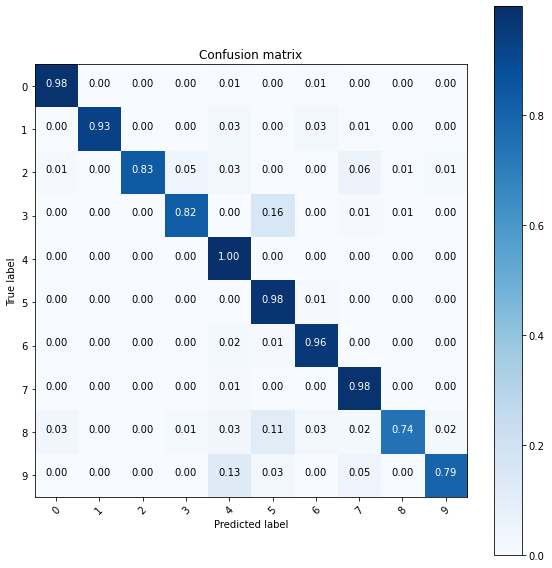

In [60]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, list(classes), normalize=True)